In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from desisim.templates import ELG, LRG
#from quickgen import ELG, LRG

/Users/andrea/desihub/desimodel/py/desimodel/io.py:20: UserWarning: No module named specter.throughput
  warnings.warn(str(e))
/Users/andrea/desihub/desimodel/py/desimodel/io.py:21: UserWarning: Unable to import specter.throughput.load_throughput(); desimodel.io.load_throughput() won't work.
  warnings.warn("Unable to import specter.throughput.load_throughput(); desimodel.io.load_throughput() won't work.")
/Users/andrea/desihub/desimodel/py/desimodel/io.py:25: UserWarning: No module named specter.psf
  warnings.warn(str(e))
/Users/andrea/desihub/desimodel/py/desimodel/io.py:26: UserWarning: Unable to import specter.psf.load_psf(); desimodel.io.load_psf() won't work.
  warnings.warn("Unable to import specter.psf.load_psf(); desimodel.io.load_psf() won't work.")


In [2]:
elg = ELG()
lrg = LRG(normfilter='decam2014-r')

INFO:io.py:601:read_basis_templates: Reading /Users/andrea/desi/spectro/templates/basis_templates/v2.2/elg_templates_v2.0.fits
INFO:io.py:601:read_basis_templates: Reading /Users/andrea/desi/spectro/templates/basis_templates/v2.2/lrg_templates_v1.3.fits


In [3]:
#ELG template spectra
eflux_S, wave_S, emeta_S = elg.make_templates(nmodel=1, nocolorcuts=True, redshift=[1.0])

In [4]:
#LRG template spectra
lflux_S, _, lmeta_S = lrg.make_templates(nmodel=1, nocolorcuts=True, redshift=[0.5], mag=[21])

In [5]:
lmeta_S

OBJTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,DECAM_FLUX [6],WISE_FLUX [2],OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
,,,,,,,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,dex,dex,dex,dex,,Gyr,K,m / s2,
str10,int32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
LRG,26,673077398,0.5,21.0,0.183071 .. 11.5929,18.7298 .. 12.1513,-1.0,-1.0,-1.0,-1.0,1.59821,177.96,-1.0,-1.0,-1.0,-1.0,-1.0,0.0096,4.46684,-1.0,-1.0,-1.0


In [6]:
emeta_S

OBJTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,DECAM_FLUX [6],WISE_FLUX [2],OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
,,,,,,,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,dex,dex,dex,dex,,Gyr,K,m / s2,
str10,int32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
ELG,6793,4168864931,1.0,21.3658,1.1978 .. 8.6771,19.8053 .. 15.5027,4.08854e-16,-1.0,60.3126,-1.0,1.07352,124.358,0.761681,-0.0895056,-0.0186378,0.048433,-0.0888288,-1.0,-1.0,-1.0,-1.0,-1.0


(0, 2e-17)

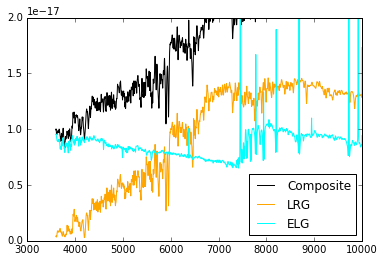

In [29]:
#Ploting the ELG with the LRG and their composit
fig, ax = plt.subplots()
ax.plot(wave_S, eflux_S[0, :] + lflux_S[0, :], color='k', label="Composite")
ax.plot(wave_S, lflux_S[0, :], color='orange', label="LRG")
ax.plot(wave_S, eflux_S[0, :], color='cyan', label="ELG")
plt.legend(loc="best")
plt.ylim(0, 2E-17)

In [8]:
#Function to calculate the magnitude of the source
# SOURCE = ELG
# LENS = LRG
def calcrmag_s(rmag_l,fsfl):
    rmag_s = rmag_l - 2.5*np.log10(fsfl)
    return rmag_s

In [90]:
#Key figure for creating spectra with a small fsfl - large fsfl
fsfl = np.array([0.01, 0.05,0.075, 0.1, 0.5, 1]) #Setting this constant #0.075, 0.5
nmodel = len(fsfl) 
rmag_l = np.array([21.0]) 
seed = 108
rmag_s = calcrmag_s(rmag_l, fsfl) 
zl = [0.5] 
zs = np.zeros_like(rmag_s)+1.0 
print(rmag_s, zs) 
rmag_s1=rmag_s[0] 
rmag_s2=rmag_s[1] 
rmag_s3=rmag_s[2] 
rmag_s4=rmag_s[3]

(array([ 26.        ,  24.25257499,  23.81234684,  23.5       ,
        21.75257499,  21.        ]), array([ 1.,  1.,  1.,  1.,  1.,  1.]))


In [91]:
#Building the ELG 
eflux1, wave, emeta1 = elg.make_templates(nmodel=nmodel, nocolorcuts=True,
                                           seed=seed, redshift=zs, mag=rmag_s)


In [41]:
#Build the LRG
lflux1, _, lmeta1 = lrg.make_templates(nmodel=1, nocolorcuts=True, 
                                       seed=seed, redshift=zl, mag=rmag_l)


In [42]:
print(eflux1.shape)
emeta1
lmeta1

(4, 32001)


OBJTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,DECAM_FLUX [6],WISE_FLUX [2],OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
,,,,,,,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,dex,dex,dex,dex,,Gyr,K,m / s2,
str10,int32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
LRG,15,1003352163,0.5,21.0,0.233608 .. 10.0516,16.8338 .. 12.5405,-1.0,-1.0,-1.0,-1.0,1.44822,212.386,-1.0,-1.0,-1.0,-1.0,-1.0,0.0096,2.37137,-1.0,-1.0,-1.0


In [67]:
print(lmag.shape)
print(emag.shape)
type(rmag_s[0])

(32001,)
(32001,)


numpy.float64

In [92]:
def flux2mag(wave, flux):
    light = 2.998E18
    mag = -2.5*np.log10(flux * wave**2 / light) - 48.6
    return mag

In [78]:
type(rmag_l)
#print("{:.2f}".format(rmag_l))

numpy.ndarray

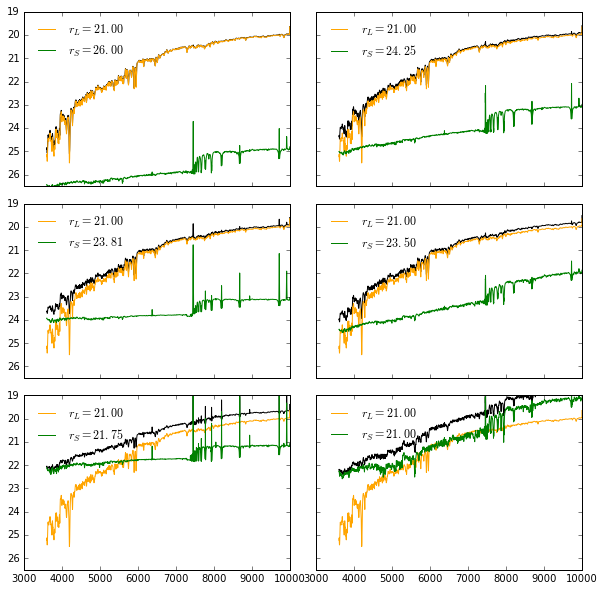

In [93]:
#Plotting the four graphs on the same axis to show the four different flux ratios
lmag = flux2mag(wave, lflux1[0,:])
fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharex=True, sharey=True)
for ii, thisax in enumerate(ax.flatten()):
    emag = flux2mag(wave, eflux1[ii,:])
    totmag = flux2mag(wave, eflux1[ii, :] + lflux1[0, :]) 
    thisax.plot(wave, totmag, color='black')
    thisax.plot(wave, lmag, color='orange', label='$r_L={:.2f}$'.format(rmag_l[0]))
    thisax.plot(wave, emag, color='green', label='$r_S={:.2f}$'.format(rmag_s[ii]))
    thisax.legend(loc="upper left", frameon=False)
    thisax.set_ylim(26.5, 19)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [26]:
#Creating random data for the different redshift/magnitudes/and flux ratios of sources and lens
seed = 108       #set of random numbers
nmodel = 100      #Number of models to make
rand = np.random.RandomState(seed)    #Random set of numbers from the spectified seed
zl = rand.uniform(0.3, 0.7, nmodel)   #Redshift of the lens
zs = rand.uniform(0.8,1.6, nmodel)    #Redshift of the source
rmag_l = rand.normal(21,0.5, nmodel)  #Magnitude of the lens with a  normal distribution centered at 21
fsfl = 10**rand.uniform(-3,0, nmodel) #Ratio of the fluxs (source/lens) ina  uniform distribution
#fsfl = 10**rand.uniform(-1,3, nmodel) #magnitude of the source small

rmag_s = calcrmag_s(rmag_l, fsfl)     #Magnitude of the source using the above function

(array([ 13.,   8.,   6.,  10.,   7.,  10.,  13.,  12.,   8.,  13.]),
 array([ 0.80022284,  0.87908335,  0.95794385,  1.03680435,  1.11566486,
         1.19452536,  1.27338586,  1.35224637,  1.43110687,  1.50996737,
         1.58882788]),
 <a list of 10 Patch objects>)

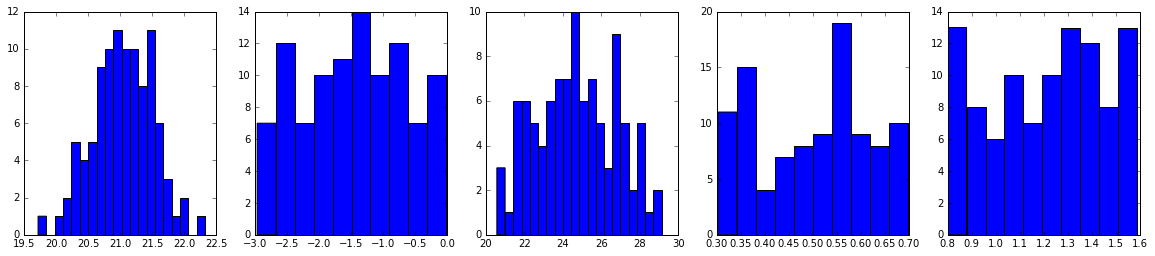

In [14]:
#Plotting the histograms
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,4))
ax1.hist(rmag_l,bins=20)    #Histograming the mag of the lens   
ax2.hist(np.log10(fsfl))    #Histograming the log of the flux ratio 
ax3.hist(rmag_s, bins=20)   #Histograming the mag of the source
ax4.hist(zl)                #Histograming the redshifts of the lens
ax5.hist(zs)                #Histogramging the redshifts of the source

In [ ]:
work on the figure that is going ot be a key figure (input figure) show what the spectra looks
like when the fs/fl is small to big
keep fl, zl=0.5 zs=1.0 constant
combination of faintness and redshift with not too much space to prob (the larger the redshift 
                                                                       the more space you have to prob)

In [ ]:
labels
redshift info

